In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Foolbox

https://foolbox.jonasrauber.de/guide/getting-started.html#getting-a-model

https://github.com/bethgelab/foolbox

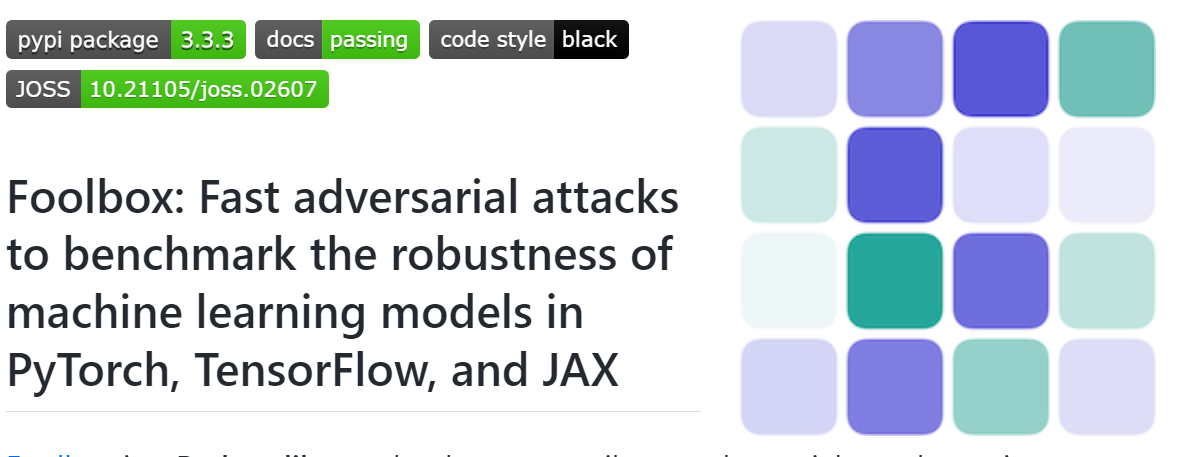

In [ ]:
!pip3 install foolbox==3.1.1
# !pip3 install git+https://github.com/bethgelab/foolbox.git

In [ ]:
!pip3 install --upgrade tensorflow

In [4]:
import foolbox as fb

## Turn your TensorFlow model into a Foolbox model

Don't forget to specify the correct bounds and preprocessing!

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.applications.ResNet50V2(weights="imagenet")
# TensorFlow ResNet50V2
preprocessing = dict( mean=[103.939, 116.779, 123.68] , std = 10)
bounds = (-1, 1)
fmodel = fb.TensorFlowModel(model, bounds=bounds, preprocessing=preprocessing)

Next you can optionally transform the bounds of the input space of `our model.` In the following, we want to work with a model that has (0, 1) bounds.

In [ ]:
fmodel = fmodel.transform_bounds((0, 1))

we will quickly check its clean accuracy on our evaluation set.

In [ ]:
fb.utils.accuracy(fmodel, images, labels)

To run an attack, we first instantiate the corresponding class.

In [ ]:
attack = fb.attacks.LinfDeepFoolAttack()

apply the attack

In [ ]:
raw, clipped, is_adv = attack(fmodel, images, labels, epsilons=0.03)

<ol><li>The raw adversarial examples. This depends on the attack and we cannot make an guarantees about this output.</li> <li>The clipped adversarial examples. These are guaranteed to not be perturbed more than epsilon and thus are the actual adversarial examples you want to visualize. Note that some of them might not actually switch the class. To know which samples are actually adversarial, you should look at the third tensor.</li> <li>The third tensor contains a boolean for each sample, indicating which samples are true adversarials that are both misclassified and within the epsilon balls around the clean samples.</li></ol>

Multiple Epsilons

In [ ]:
import numpy as np
epsilons = np.linspace(0.0, 0.005, num=20)
raw, clipped, is_adv = attack(fmodel, images, labels, epsilons=epsilons)

The returned tensors, raw, clipped, and is_adv now have an additional batch dimension for the different epsilons

### Robust Accuracy

In [ ]:
robust_accuracy = 1 - is_adv.float32().mean(axis=-1)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(epsilons, robust_accuracy.numpy())